In [1]:
import tensorflow

In [2]:
import libs

In [12]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.misc import imresize
import cv2 as cv

In [4]:
baseDir = "/Users/Gautam/Google Drive/Machine Learning/WORKSHOP/imgs/"

fileList = []

for path in os.listdir(baseDir):
    if path != ".DS_Store":
        fileList.append(baseDir + path)

In [24]:
img = plt.imread(fileList[100])


105

In [22]:
img.shape

(512, 512, 4)

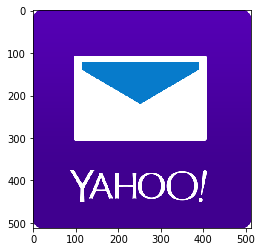

In [49]:
plt.imshow(img)

In [29]:
resizedImages = []

for imageIndex in range(len(fileList)):
    readImage = cv.imread(fileList[imageIndex])
    resizedImages.append(cv.resize(readImage, (100, 100)))

In [32]:
smallImg = resizedImages[101]

In [27]:
smallImg.shape

(100, 100, 3)

In [34]:
mean_image = np.mean(resizedImages)

In [35]:
print(mean_image)

126.11224381


In [36]:
dataSet = np.array(resizedImages)

In [59]:
meanImage = np.mean(dataSet, axis=0)
meanImage.max()

185.80000000000001

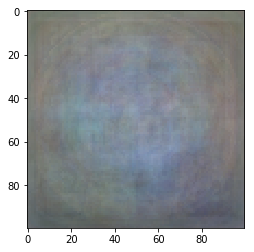

In [57]:
plt.imshow(meanImage / 255.0)

In [51]:
print(dataSet)

[[[[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]

  [[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]

  [[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]

  ..., 
  [[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]

  [[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]

  [[  0  68   8]
   [  0  68   8]
   [  0  68   8]
   ..., 
   [  0  68   8]
   [  0  68   8]
   [  0  68   8]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0  

In [53]:
stdDeviation = np.std(dataSet, axis = 0)

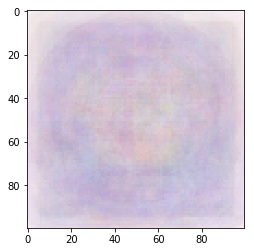

In [65]:
plt.imshow(stdDeviation / stdDeviation.max()) #+0.5 treat image pixels as observatione

In [58]:
stdDeviation.max()

115.0519299097747

In [67]:
flatttened = dataSet.ravel()

In [68]:
flattened

array([ 0, 68,  8, ..., 80, 77, 31], dtype=uint8)

(array([ 367405.,   32841.,   16810.,   17595.,   21315.,   15016.,
           8949.,   11531.,   17235.,    8620.,    8043.,   14445.,
          12010.,    7994.,    9689.,   13606.,    7763.,    7478.,
           7982.,    7697.,   15071.,    8788.,   19973.,   10998.,
           9286.,    8108.,   10929.,    9869.,   12617.,    9313.,
          16119.,    7522.,   12472.,    6804.,    8431.,   15290.,
          10643.,    7032.,    8123.,   27354.,    7314.,   10002.,
          10638.,    7533.,    8116.,   10443.,    7696.,    8967.,
          10238.,   18163.,   13304.,   31630.,   11894.,   12285.,
           7463.,    8365.,    8312.,    7395.,    6426.,   10352.,
          16235.,   14055.,    9677.,   21749.,   13269.,    7616.,
           6982.,    8352.,   14288.,   10404.,   16531.,    7166.,
          10307.,   11379.,    7319.,    6901.,    6932.,    6300.,
           6268.,    6304.,   12394.,   12081.,    7893.,    8373.,
           7270.,   17397.,    6594.,    6620., 

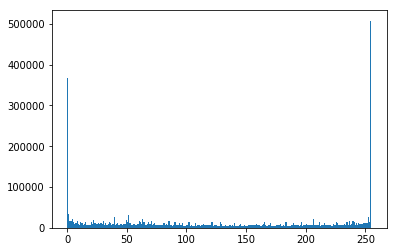

In [69]:
plt.hist(flattened, 255)

In [70]:
# Normalization: norm_image = (image - meanImage) / stdDeviation

In [71]:
normalizedDataSet = (dataSet - meanImage) / stdDeviation

In [73]:
normalizedDataSet.min(), normalizedDataSet.max()

(-2.1556975299821204, 1.9837802720736371)

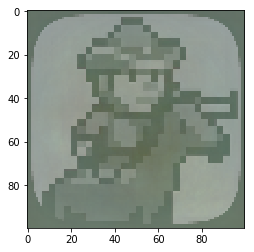

In [80]:
plt.imshow(normalizedDataSet[0] / 10 + 0.5)

(array([  6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   7.00000000e+00,   1.20000000e+01,
          7.00000000e+00,   8.00000000e+00,   1.40000000e+01,
          3.00000000e+01,   2.50000000e+01,   5.60000000e+01,
          6.30000000e+01,   5.30000000e+01,   1.47000000e+02,
          9.40000000e+01,   1.42000000e+02,   2.33000000e+02,
          2.41000000e+02,   2.98000000e+02,   4.27000000e+02,
          4.77000000e+02,   5.05000000e+02,   6.47000000e+02,
          7.67000000e+02,   1.01000000e+03,   1.27600000e+03,
          1.44200000e+03,   1.68800000e+03,   2.12600000e+03,
          2.36500000e+03,   2.85200000e+03,   3.23500000e+03,
          3.79500000e+03,   4.28000000e+03,   4.92400000e+03,
          5.38000000e+03,   5.72500000e+03,   6.74700000e+03,
          7.02800000e+03,   8.19200000e+03,   8.86200000e+03,
          9.73200000e+03,   1.09300000e+04,   1.23780000e+04,
          1.34080000e+04,   1.50450000e+04,   1.56950000e+04,
        

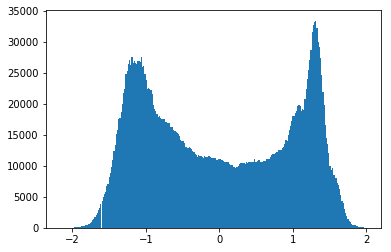

In [81]:
plt.hist(normalizedDataSet.ravel(), 255)